<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.608833,26.797431,65.139870,0.364078,159.910213,159.522247,0.387966
1,0.0,1.0,82.000453,66.093046,80.086922,-0.029711,238.150710,238.116445,0.034265
2,0.0,2.0,32.826105,33.931166,66.477787,0.044722,143.279781,143.244864,0.034916
3,0.0,3.0,40.191587,24.921778,32.100202,0.046146,107.259713,107.259357,0.000356
4,0.0,4.0,88.370883,46.890416,55.762054,0.048257,201.071609,200.978792,0.092817
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.001546,70.197487,87.075891,-0.003066,211.271858,211.309692,-0.037834
119996,999.0,116.0,69.306377,79.632317,57.535041,0.296205,216.769941,216.482458,0.287483
119997,999.0,117.0,23.720651,54.788685,29.621213,-0.428571,117.701978,118.064798,-0.362820
119998,999.0,118.0,84.494437,88.503687,63.401043,-0.126964,246.272204,246.427695,-0.155491


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.608833,26.797431,65.139870,0.364078,159.910213,159.522247,0.387966
1,0.0,1.0,82.000453,66.093046,80.086922,-0.029711,238.150710,238.116445,0.034265
2,0.0,2.0,32.826105,33.931166,66.477787,0.044722,143.279781,143.244864,0.034916
3,0.0,3.0,40.191587,24.921778,32.100202,0.046146,107.259713,107.259357,0.000356
4,0.0,4.0,88.370883,46.890416,55.762054,0.048257,201.071609,200.978792,0.092817
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.001546,70.197487,87.075891,-0.003066,211.271858,211.309692,-0.037834
119996,999.0,116.0,69.306377,79.632317,57.535041,0.296205,216.769941,216.482458,0.287483
119997,999.0,117.0,23.720651,54.788685,29.621213,-0.428571,117.701978,118.064798,-0.362820
119998,999.0,118.0,84.494437,88.503687,63.401043,-0.126964,246.272204,246.427695,-0.155491


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    57.608833  26.797431  65.139870  ...  159.910213  159.522247  0.387966
      1.0    82.000453  66.093046  80.086922  ...  238.150710  238.116445  0.034265
      2.0    32.826105  33.931166  66.477787  ...  143.279781  143.244864  0.034916
      3.0    40.191587  24.921778  32.100202  ...  107.259713  107.259357  0.000356
      4.0    88.370883  46.890416  55.762054  ...  201.071609  200.978792  0.092817
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  44.001546  70.197487  87.075891  ...  211.271858  211.309692 -0.037834
      116.0  69.306377  79.632317  57.535041  ...  216.769941  216.482458  0.287483
      117.0  23.720651  54.788685  29.621213  ...  117.701978  118.064798 -0.362820
      118.0  84.494437  88.503687  63.401043  ...  246.272204  246.427695 -0.155491
      119.0  36.853865  39.509270  99.667363  ...  185.921831  186.074988 -0.153156

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    57.608833  26.797431  65.139870  ...  159.910213  159.522247  0.387966
      1.0    82.000453  66.093046  80.086922  ...  238.150710  238.116445  0.034265
      2.0    32.826105  33.931166  66.477787  ...  143.279781  143.244864  0.034916
      3.0    40.191587  24.921778  32.100202  ...  107.259713  107.259357  0.000356
      4.0    88.370883  46.890416  55.762054  ...  201.071609  200.978792  0.092817
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  44.001546  70.197487  87.075891  ...  211.271858  211.309692 -0.037834
      116.0  69.306377  79.632317  57.535041  ...  216.769941  216.482458  0.287483
      117.0  23.720651  54.788685  29.621213  ...  117.701978  118.064798 -0.362820
      118.0  84.494437  88.503687  63.401043  ...  246.272204  246.427695 -0.155491
      119.0  36.853865  39.509270  99.667363  ...  185.921831  186.074988 -0.153156

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.608833,26.797431,65.139870,0.364078,159.910213,159.522247,0.387966
1,0.0,1.0,82.000453,66.093046,80.086922,-0.029711,238.150710,238.116445,0.034265
2,0.0,2.0,32.826105,33.931166,66.477787,0.044722,143.279781,143.244864,0.034916
3,0.0,3.0,40.191587,24.921778,32.100202,0.046146,107.259713,107.259357,0.000356
4,0.0,4.0,88.370883,46.890416,55.762054,0.048257,201.071609,200.978792,0.092817
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,44.001546,70.197487,87.075891,-0.003066,211.271858,211.309692,-0.037834
119996,999.0,116.0,69.306377,79.632317,57.535041,0.296205,216.769941,216.482458,0.287483
119997,999.0,117.0,23.720651,54.788685,29.621213,-0.428571,117.701978,118.064798,-0.362820
119998,999.0,118.0,84.494437,88.503687,63.401043,-0.126964,246.272204,246.427695,-0.155491


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    57.608833  26.797431  65.139870  ...  159.910213  159.522247  0.387966
      1.0    82.000453  66.093046  80.086922  ...  238.150710  238.116445  0.034265
      2.0    32.826105  33.931166  66.477787  ...  143.279781  143.244864  0.034916
      3.0    40.191587  24.921778  32.100202  ...  107.259713  107.259357  0.000356
      4.0    88.370883  46.890416  55.762054  ...  201.071609  200.978792  0.092817
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  44.001546  70.197487  87.075891  ...  211.271858  211.309692 -0.037834
      116.0  69.306377  79.632317  57.535041  ...  216.769941  216.482458  0.287483
      117.0  23.720651  54.788685  29.621213  ...  117.701978  118.064798 -0.362820
      118.0  84.494437  88.503687  63.401043  ...  246.272204  246.427695 -0.155491
      119.0  36.853865  39.509270  99.667363  ...  185.921831  186.074988 -0.153156

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

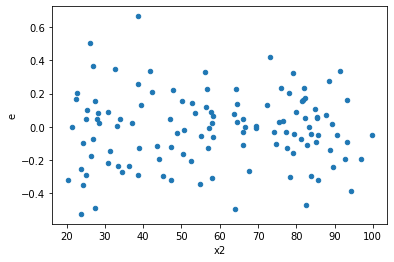

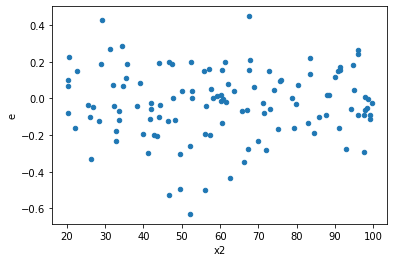

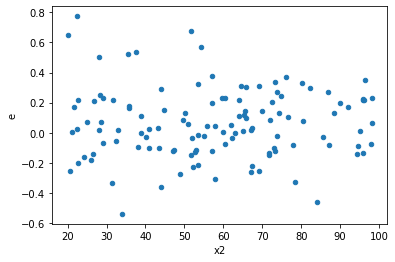

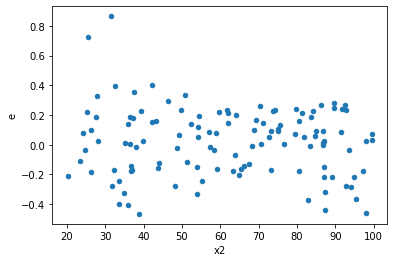

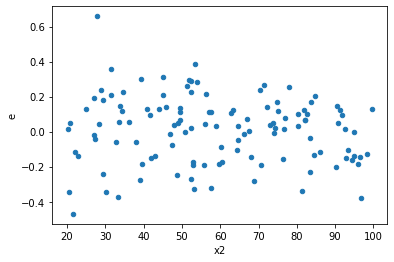

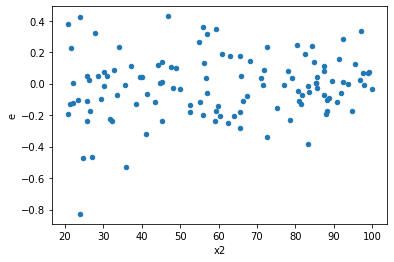

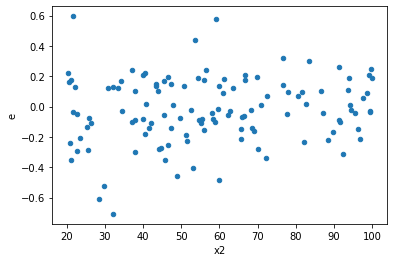

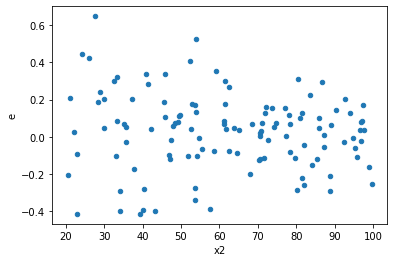

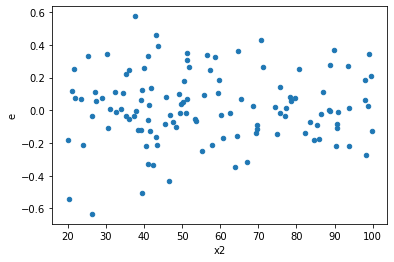

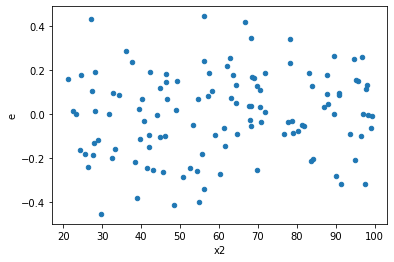

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [ ]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
292.0,45.0,45.0,1.932451011603355,1.6888978433166681,0.04391934117280352,0.03838404189356064,1.1442083482138836,0.6533095217106666,0.6733452391446667,Reject005=1 : Homoscedasticity
357.0,45.0,45.0,1.840145888647133,1.6521531709489377,0.04182149746925302,0.037548935703384946,1.1137864944993079,0.7193201239990774,0.6403399380004613,Reject005=1 : Homoscedasticity
481.0,45.0,45.0,2.1091915419959415,1.5988668956510388,0.04793617140899867,0.03633788399206906,1.3191789433710832,0.35626330163902353,0.8218683491804882,Reject005=1 : Homoscedasticity
486.0,45.0,45.0,2.0885052425115425,2.055040607417239,0.04746602823889869,0.0467054683503918,1.0162841721830311,0.9570320402065438,0.5214839798967281,Reject005=1 : Homoscedasticity
508.0,45.0,45.0,1.4351479077060432,1.3154513193681987,0.03261699790241007,0.029896620894731787,1.0909927920368303,0.7714807266314385,0.6142596366842807,Reject005=1 : Homoscedasticity
543.0,45.0,45.0,1.7166756436647679,1.6638804589733631,0.03901535553783563,0.037815464976667344,1.0317301548958513,0.9170184993058483,0.5414907503470758,Reject005=1 : Homoscedasticity
615.0,45.0,45.0,2.0240529133442062,1.9769348940674685,0.046001202576004686,0.04493033850153338,1.0238338750649467,0.9373787025314837,0.5313106487342582,Reject005=1 : Homoscedasticity
654.0,45.0,45.0,1.8872112660162081,1.8743223598892194,0.042891165136732,0.04259823545202771,1.0068765685150076,0.9817632124010824,0.5091183937994588,Reject005=1 : Homoscedasticity
702.0,45.0,45.0,1.5077616854361742,1.2291711498846407,0.03426731103264032,0.02793570795192365,1.226649100556647,0.49598979446826097,0.7520051027658695,Reject005=1 : Homoscedasticity


In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,1.6560282447381849,2.546851911169274,0.03763700556223148,0.057882997981119864,0.650225573570115,0.15263832083436693,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,1.205674593300177,1.830848568180708,0.02740169530227675,0.04161019473137973,0.6585332147367279,0.16501732639384326,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,1.7163431132763005,3.223000323176697,0.03900779802900683,0.07325000734492493,0.5325296125271919,0.03708240417331226,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,1.7892030879868472,3.475535691966556,0.040663706545155616,0.07898944754469445,0.5147992271011511,0.028165538948046763,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,1.0591754922856684,1.9412128705238372,0.024072170279219738,0.044118474330087205,0.5456256283731775,0.04489064423857948,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,0.9269701134812306,2.5940934613468287,0.021067502579118876,0.05895666957606429,0.3573387494681693,0.0007755844566999112,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,1.140707510315389,2.8276412129393127,0.025925170688986112,0.06426457302134801,0.4034131010311707,0.002896259165665549,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,0.9820027244180436,3.0073189770504687,0.022318243736773716,0.06834815856932884,0.3265376010698993,0.0002699438704478652,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,1.5566215398916419,2.9584871382094344,0.03537776227026459,0.06723834405021442,0.5261545740008712,0.03366567475217128,Reject005=1 : Homoscedasticity


In [ ]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity    1000
Name: Result_test, dtype: int64